In [2]:
import pandas as pd
import re


In [3]:

train_df = pd.read_csv("twitter_training.csv")
validation_df = pd.read_csv("twitter_validation.csv")


In [4]:
def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ''  

In [5]:
train_df['clean_tweet'] = train_df.iloc[:, 3].apply(preprocess_text)
validation_df['clean_tweet'] = validation_df.iloc[:, 3].apply(preprocess_text)


In [6]:
print("Training Set:")
print(train_df.head())


Training Set:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  \
0  I am coming to the borders and I will kill you...      
1  im getting on borderlands and i will kill you ...      
2  im coming on borderlands and i will murder you...      
3  im getting on borderlands 2 and i will murder ...      
4  im getting into borderlands and i can murder y...      

                                         clean_tweet  
0  i am coming to the borders and i will kill you...  
1  im getting on borderlands and i will kill you all  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands and i will murder yo...  
4  im getting into borderlands and i can murder y...  


In [7]:
print(validation_df.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  \
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                   
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                   
2  CSGO matchmaking is so full of closet hacking,...     

In [8]:
print("Validation Set:")
print(validation_df.head())

Validation Set:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  \
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                   
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                   
2  CSGO matchmaking is so full of closet 

In [9]:
print(train_df.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', 'clean_tweet'],
      dtype='object')


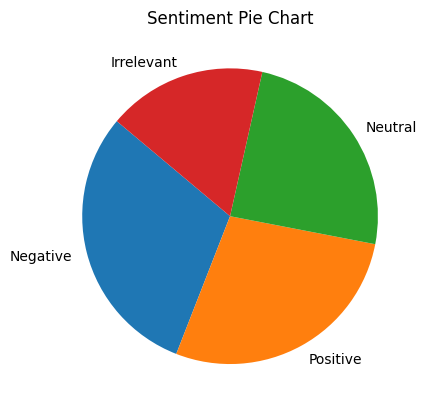

In [10]:
import matplotlib.pyplot as plt
class_distribution = train_df.iloc[:, 2].value_counts()
plt.pie(class_distribution, labels=class_distribution.index, startangle=140)
plt.title('Sentiment Pie Chart')
plt.show()


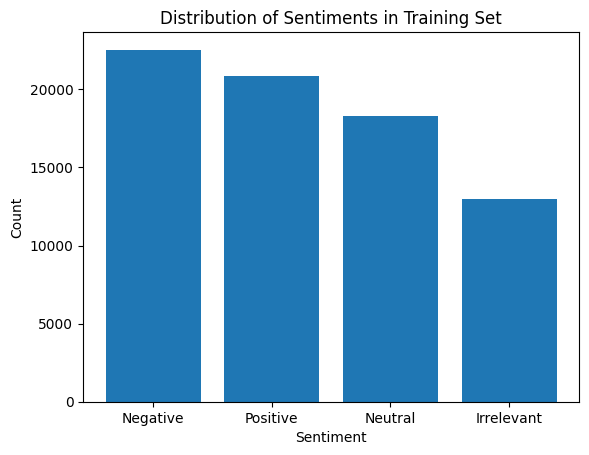

In [11]:
import matplotlib.pyplot as plt


class_distribution = train_df.iloc[:, 2].value_counts()

plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Training Set')
plt.show()


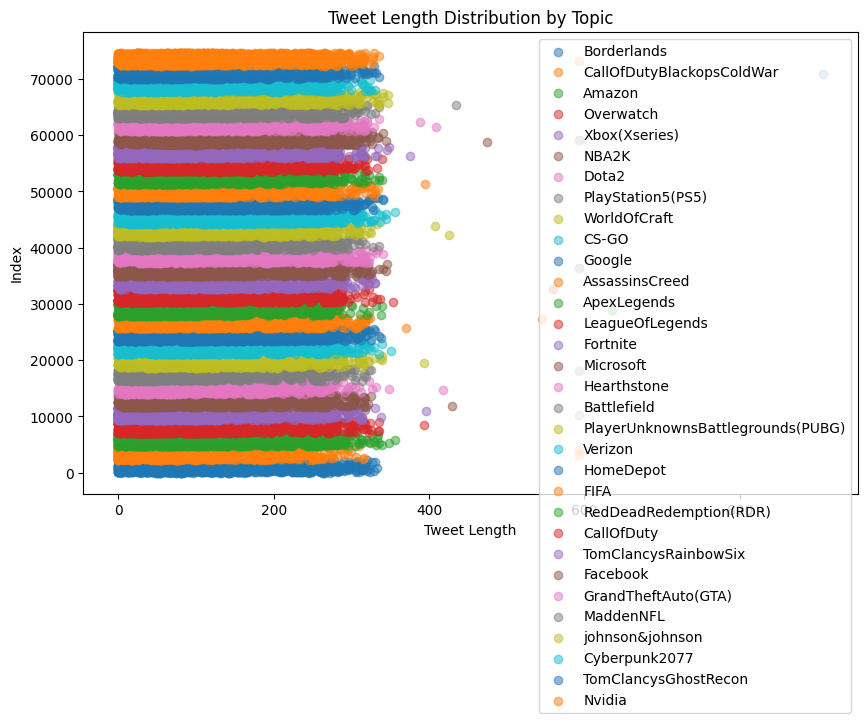

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
topics = train_df.iloc[:, 1].unique() 

for topic in topics:
    plt.scatter(train_df[train_df.iloc[:, 1] == topic]['tweet_length'], 
                train_df[train_df.iloc[:, 1] == topic].index, 
                label=topic, alpha=0.5)

plt.xlabel('Tweet Length')
plt.ylabel('Index')
plt.title('Tweet Length Distribution by Topic')
plt.legend()
plt.show()
